## New York City Taxi service exploratory analysis

This notebook is a data analysis of New York City's Taxi services. 

The dataset utilized will be the dataset provided for Kaggle.com's 'New York City Taxi Fare Prediction' competition. 

The nature of the analysis in this notebook will be exploratory in order to unearth insights that would help identify and solve business problems.

The necessary packages are imported and the dataset is imported into a Pandas dataframe (train). The next few lines of code will display the shape, info as well as the head of the dataframe. 


In [4]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import calendar
import datetime as dt

In [5]:
train = pd.read_csv('train.csv')

train.shape

(1458644, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Data cleaning

We can observe that the columns 'pickup_datetime' and 'dropoff_datetime' are object data types. The code below will convert these columns into the datetime data type for easier manipulation as well as the trip duration from seconds into minutes. After converting those columns, we pass in an .info() command to check that it has indeed been converted to a datetime data type.

Other than checking for any missing values with the "isnull" command, we'll find the range of the dataset by passing in the min & max of the pickup times, revealing to us that the dataset consist of data over a period of 6 months from Jan to June of 2016.

In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')
train['trip_duration_in_minutes'] = train['trip_duration'].apply(lambda x:x/60)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                          1458644 non-null object
vendor_id                   1458644 non-null int64
pickup_datetime             1458644 non-null datetime64[ns]
dropoff_datetime            1458644 non-null datetime64[ns]
passenger_count             1458644 non-null int64
pickup_longitude            1458644 non-null float64
pickup_latitude             1458644 non-null float64
dropoff_longitude           1458644 non-null float64
dropoff_latitude            1458644 non-null float64
store_and_fwd_flag          1458644 non-null object
trip_duration               1458644 non-null int64
trip_duration_in_minutes    1458644 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 133.5+ MB


In [10]:
train[pd.isnull(train)].sum()

id                          0.0
vendor_id                   0.0
pickup_datetime             0.0
dropoff_datetime            0.0
passenger_count             0.0
pickup_longitude            0.0
pickup_latitude             0.0
dropoff_longitude           0.0
dropoff_latitude            0.0
store_and_fwd_flag          0.0
trip_duration               0.0
trip_duration_in_minutes    0.0
dtype: float64

In [11]:
print("Min pickup time:",min(train['pickup_datetime']))
print("Max pickup time:",max(train['pickup_datetime']))

#rides are from 1st Jan to 30th June midnight

Min pickup time: 2016-01-01 00:00:17
Max pickup time: 2016-06-30 23:59:39


#### As the pickup and dropoff columns are now datetime data types, we can pass in functions to create new columns while extracting the day of week, date and hour of the pickups & dropoffs.






In [12]:
train['pickup_date']= train['pickup_datetime'].dt.date
train['pickup_day'] = train['pickup_datetime'].apply(lambda x:x.day)
train['pickup_hour']=train['pickup_datetime'].apply(lambda x:x.hour)
train['pickup_day_of_week']=train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

train['dropoff_date']= train['dropoff_datetime'].dt.date
train['dropoff_day']=train['dropoff_datetime'].apply(lambda x:x.day)
train['dropoff_hour']=train['dropoff_datetime'].apply(lambda x:x.hour)
train['dropoff_day_of_week']=train['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [13]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_in_minutes,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333,2016-03-14,14,17,Monday,2016-03-14,14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000,2016-06-12,12,0,Sunday,2016-06-12,12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000,2016-01-19,19,11,Tuesday,2016-01-19,19,12,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000,2016-04-06,6,19,Wednesday,2016-04-06,6,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000,2016-03-26,26,13,Saturday,2016-03-26,26,13,Saturday


## Trip volume by day of week

The countplots display the total number of pickups and dropoffs respectively for any given day, separated by vendor_id, based on the new 'pickup day of week' and 'dropoff day of week' columns that were newly created. The columns are sorted by value, with the highest volume of rides occured on Friday, followed by Saturday, Thursday and so on. This provides a clearer picture of which days represented the highest volume of taxi rides, separated by the respective vendors.

The volume of rides visualized paint a similar picture for both pickups and dropoff. Vendor 2 (green) vastly outranks vendor 1 (blue) on all days. This could either indicate a higher volume of taxis available from vendor 2 or a preference over vendor 1.

Nevertheless, we will explore other visualizations.

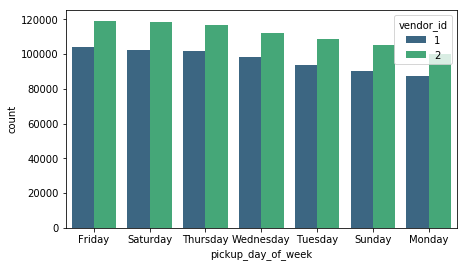

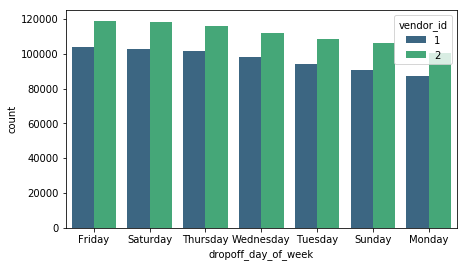

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(x='pickup_day_of_week', data = train, palette = 'viridis', order=train['pickup_day_of_week'].value_counts().index, hue='vendor_id')

plt.figure(figsize=(7,4))
sns.countplot(x='dropoff_day_of_week', data = train, palette = 'viridis', order=train['dropoff_day_of_week'].value_counts().index, hue = 'vendor_id')

## Trip volume by hour

Similar to the previous section, these plots display the volume of taxi rides for each hour, segrated once again by vendor id. Vendor 2 displays a higher volume at almost all hours with the hours sorted by volume. 

7pm/1900hrs is shown to have the highest taxi ride volume throughout the day. In order to ease the demand, surge pricing/peak hour pricing could be implemented as well as incentives to take taxis before 6pm or after 8pm.

Massive drop in taxi rides on the 31st could be investigated. Incentives could be explored for taxi drivers to work on the 31st to make up for thee reduction in services if it is a supply problem. On the other hand, discounts could be implemented to incentivise customers to take the taxi on the 31st of each month if it is a demand issue.

Vendor 1 could possibly choose to focus on its after midnight taxi services, specifically 3/4/5/6 am as those are the only hours which their taxi ride volumes are on par with vendor 2. They could attempt to be the market leader for after-midnight taxi services.

An alternative would be for them to focus on the hours where the disparity is the greatest to capture more of the markete share by targeting high volume hours.

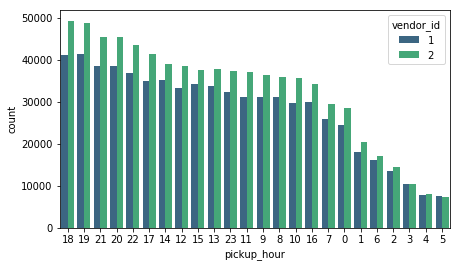

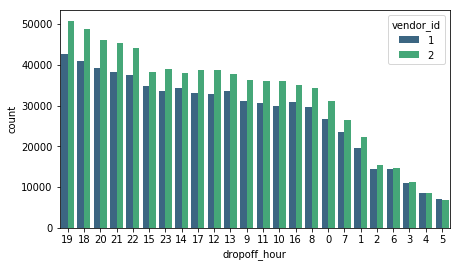

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='pickup_hour', data = train, palette = 'viridis', order=train['pickup_hour'].value_counts().index, hue='vendor_id')

plt.figure(figsize=(7,4))
sns.countplot(x='dropoff_hour', data = train, palette = 'viridis', order=train['dropoff_hour'].value_counts().index, hue= 'vendor_id')

### Trips by vendor and passenger count

The plot below display about 100,000 rides in favor of vendor 2 over the 6 month period.

As majority of the passengers were 1 passenger trips. Both vendors could look into ride-sharing or taxi-pooling in order to optimize taxi capacity and driver incentive.

Even though Vendor 1 is leading primarily in 1 passenger count rides, it has no taxis that caters to 5/6 passengers and is losing out in all other categories. Vendor 1 could inveeest into taxis with higher passenger capacity to capture some of the markeet share. Another possible reason could be due the neighbourhoods that vendor 1 primarily operates where most passengers are going and returning from work, hence the majority of rides having a passenger countt of 1 and the lack of neeed to invest in taxis with higher passenger capacities (e.g. > 5 passengers).

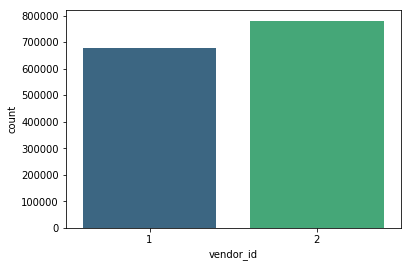

In [16]:
sns.countplot(x='vendor_id', data = train, palette = 'viridis')

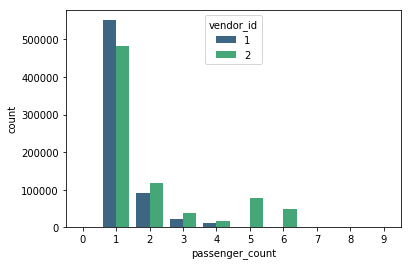

In [17]:
sns.countplot(x='passenger_count', data = train, palette = 'viridis', hue = 'vendor_id')

In [18]:
train['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

### Trip frequency by date

The total trip frequency is displayed on the line plot below. There is a sharp dip in frequency on 2016-01-23 that should be investigated and exists as an outlier to the rest of the data. Such drastic dips should serve as a point of interest or concern. The dip seems to affect both vendors, which indicates that it is most likely not a company issue.

The dip occurred on 2016-01-023 with only 1648 taxi rides on that particular day, compared to the mean of 8014 rides/day

id    2016-01-23
dtype: object
id    1648
dtype: int64
id    8014.527473
dtype: float64


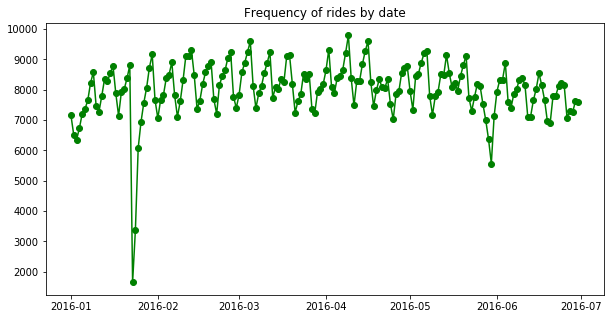

In [30]:
plt.figure(figsize=(10,5))
plt.title('Frequency of rides by date')
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-',label='train', color='green')

print(train.groupby('pickup_date').count()[['id']].idxmin())
print(train.groupby('pickup_date').count()[['id']].min())
print(train.groupby('pickup_date').count()[['id']].mean())

## Conclusion 

Descriptive statistics and data visualizations were utilized to identify missed revenue opportunities and recommend solutions for this particular dataset. The aim of this project was to provide intuitive data visualizations in order to analyse and identify the opportunities easier, and then providing possible recommendations.

Given that the dataset has close to 1.5 million rows, visualizations such as countplots and lineplots are necessary to present the information in a format that is easy to read and understand. This is especially important when communicating business results to non-technical parties.

This project also demonstrates the importance of data cleaning (with Pandas) to ensure that the dataset is suitable for analysis, so that actionable and valuable insights may be extracted.